In [57]:
# Dieses Skript lädt Finanzdaten aus Yahoo Finance, bereinigt sie, berechnet Kennzahlen und visualisiert diese

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [59]:
# Yahoo Finance spezifisch: Auswählen der Fonds/Indizes zum analysieren
tickers = ["VTI", "IEFA", "DAX"]

In [60]:
# Historische Preise der zuvor ausgewählten Fonds von Yahoo Finance herunterladen und als CSV abspeichern
df = yf.download(tickers, start = "2015-01-01", auto_adjust=True)
df.to_csv("data/prices.csv")

[*********************100%***********************]  3 of 3 completed


In [61]:
# Datenbereinigung
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2701 entries, 2015-01-02 to 2025-09-29
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, DAX)    2701 non-null   float64
 1   (Close, IEFA)   2701 non-null   float64
 2   (Close, VTI)    2701 non-null   float64
 3   (High, DAX)     2701 non-null   float64
 4   (High, IEFA)    2701 non-null   float64
 5   (High, VTI)     2701 non-null   float64
 6   (Low, DAX)      2701 non-null   float64
 7   (Low, IEFA)     2701 non-null   float64
 8   (Low, VTI)      2701 non-null   float64
 9   (Open, DAX)     2701 non-null   float64
 10  (Open, IEFA)    2701 non-null   float64
 11  (Open, VTI)     2701 non-null   float64
 12  (Volume, DAX)   2701 non-null   int64  
 13  (Volume, IEFA)  2701 non-null   int64  
 14  (Volume, VTI)   2701 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 337.6 KB


Price   Ticker
Close   DAX       0
        IEFA      0
        VTI       0
High    DAX       0
        IEFA      0
        VTI       0
Low     DAX       0
        IEFA      0
        VTI       0
Open    DAX       0
        IEFA      0
        VTI       0
Volume  DAX       0
        IEFA      0
        VTI       0
dtype: int64

In [62]:
df.dropna(inplace = True)

In [63]:
# Datenaufbereitung
if isinstance(df.columns, pd.MultiIndex):
    df = df["Close"]

In [64]:
returns = df.pct_change().dropna()

In [65]:
cum_returns = (1+returns).cumprod()-1

In [66]:
annual_return = returns.mean()*252

In [67]:
annual_vol = returns.std()*(252**0.5)

In [68]:
sharpe = annual_return/annual_vol

In [69]:
# Dataframe mit wichtigsten Metrics
kpis = pd.DataFrame({
    "Annual Return": annual_return,
    "Annual Volatility": annual_vol,
    "Sharpe Ratio": sharpe
    }).round(3)

In [70]:
print("Performance KPIs:")
print(kpis)

Performance KPIs:
        Annual Return  Annual Volatility  Sharpe Ratio
Ticker                                                
DAX             0.096              0.215         0.445
IEFA            0.086              0.173         0.498
VTI             0.139              0.182         0.762


In [71]:
kpis.to_csv("data/kpis.csv")

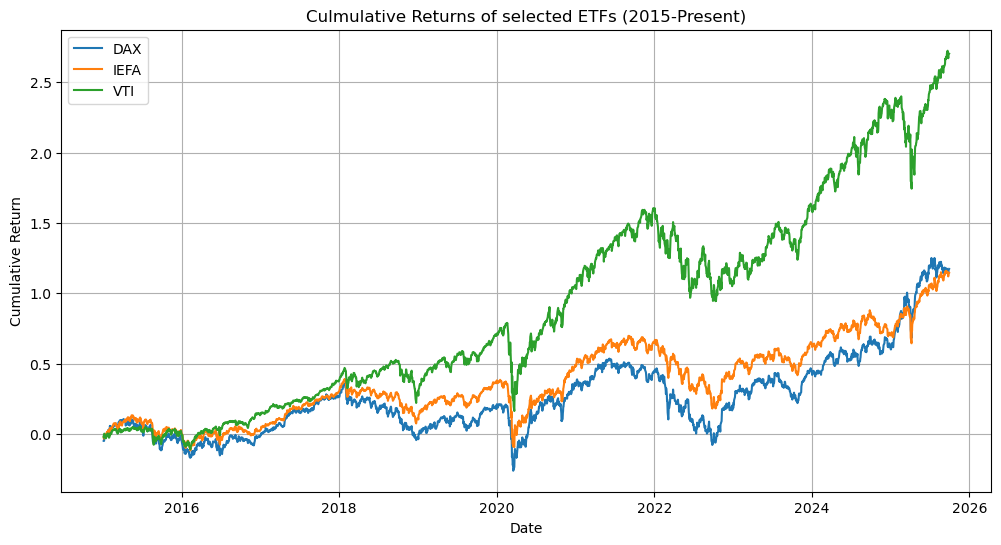

In [74]:
# Visualisierung der kummulativen Renditen und Sharpe Ratios in zwei Diagrammen
plt.figure(figsize=(12,6))
for col in cum_returns.columns:
    plt.plot(cum_returns.index, cum_returns[col], label = col)
plt.title("Culmulative Returns of selected ETFs (2015-Present)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.savefig("chart1", dpi = 300, bbox_inches = "tight")
plt.show()

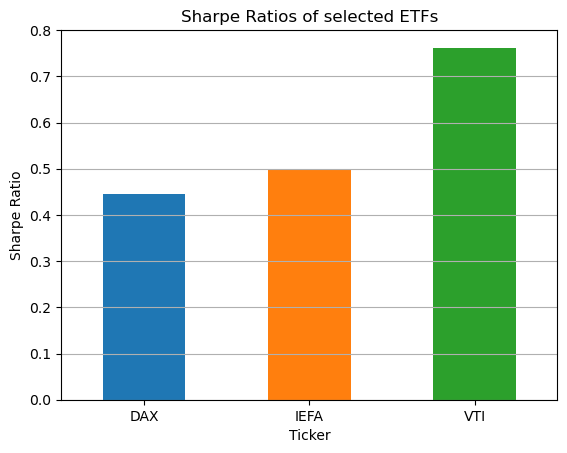

In [75]:
#plt.figure(figsize=(8,5))
kpis["Sharpe Ratio"].plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title("Sharpe Ratios of selected ETFs")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation = 0)
plt.grid(axis = "y")
plt.savefig("chart2", dpi = 300, bbox_inches = "tight")
plt.show()